In [ ]:
import yfinance as yf
dat = yf.Ticker("MSFT")

In [ ]:
dat = yf.Ticker("MSFT")
dat.info
dat.calendar
dat.analyst_price_targets
dat.quarterly_income_stmt
dat.history(period='1mo') # 1 month of historical data
dat.option_chain(dat.options[0]).calls

In [ ]:
from data_fetch import get_price
start = '2024-01-01'
end = '2025-01-01'
prices = get_price(['AAPL', 'MSFT'], start, end)
prices

In [ ]:
#setting pandas to display floats with 2 decimal places
import pandas as pd

# Set pandas to display floats with 2 decimal places
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
prices['Close']

In [ ]:
from data_fetch import get_price
from portfolio import Portfolio
from plotter import plot_prices

shares = ['AAPL', 'MSFT']

portfolio = Portfolio()
for symbol in shares:
    portfolio.add_asset(symbol, 1)



start = '2024-01-01'
end = '2025-01-01'

prices_df = get_price(shares, start, end)
prices_close_df = prices_df['Close']

print("Portfolio Value:", portfolio.get_portfolio_value(prices_close_df))
#plot_prices(prices_close_df)

In [1]:
#1. getting data from yfinance
# Example usage
from data_fetch import get_price
from portfolio import Portfolio
from plotter import plot_prices

shares = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'TSLA', 'NVDA', 'NFLX']
num_shares = [1, 1, 1, 1, 1, 1, 1] # Number of shares for each asset
portfolio = Portfolio()
for i, symbol in enumerate(shares):
    portfolio.add_asset(symbol, num_shares[i])



prices_df = get_price(shares)
#prices_df.to_csv('prices.csv', index=True)
prices_df

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  7 of 7 completed


Price        Close                                                     High  \
Ticker        AAPL    AMZN    GOOG    MSFT     NFLX    NVDA    TSLA    AAPL   
Date                                                                          
1980-12-12    0.10     NaN     NaN     NaN      NaN     NaN     NaN    0.10   
1980-12-15    0.09     NaN     NaN     NaN      NaN     NaN     NaN    0.09   
1980-12-16    0.09     NaN     NaN     NaN      NaN     NaN     NaN    0.09   
1980-12-17    0.09     NaN     NaN     NaN      NaN     NaN     NaN    0.09   
1980-12-18    0.09     NaN     NaN     NaN      NaN     NaN     NaN    0.09   
...            ...     ...     ...     ...      ...     ...     ...     ...   
2025-05-19  208.78  206.16  167.87  458.87  1191.64  135.57  342.09  209.48   
2025-05-20  206.86  204.07  165.32  458.17  1192.02  134.38  343.82  208.47   
2025-05-21  202.09  201.12  170.06  452.57  1194.63  131.80  334.62  207.04   
2025-05-22  201.36  203.10  171.98  454.86  1187.97  132.83  341.04  202.75   
2025-05-23  195.27  200.99  169.59  450.18  1185.39  131.29  339.34  197.70   

Price                       ...     Open                     Volume  \
Ticker        AMZN    GOOG  ...     NFLX    NVDA    TSLA       AAPL   
Date                        ...                                       
1980-12-12     NaN     NaN  ...      NaN     NaN     NaN  469033600   
1980-12-15     NaN     NaN  ...      NaN     NaN     NaN  175884800   
1980-12-16     NaN     NaN  ...      NaN     NaN     NaN  105728000   
1980-12-17     NaN     NaN  ...      NaN     NaN     NaN   86441600   
1980-12-18     NaN     NaN  ...      NaN     NaN     NaN   73449600   
...            ...     ...  ...      ...     ...     ...        ...   
2025-05-19  206.62  167.95  ...  1173.58  132.39  336.30   46140500   
2025-05-20  205.59  169.68  ...  1186.79  134.29  347.87   42496600   
2025-05-21  203.46  174.53  ...  1186.50  133.06  344.43   59211800   
2025-05-22  205.76  178.13  ...  1192.40  132.23  331.90   46742400   
2025-05-23  202.37  171.21  ...  1184.00  130.00  337.92   78314800   

Price                                                                   \
Ticker            AMZN        GOOG        MSFT       NFLX         NVDA   
Date                                                                     
1980-12-12         NaN         NaN         NaN        NaN          NaN   
1980-12-15         NaN         NaN         NaN        NaN          NaN   
1980-12-16         NaN         NaN         NaN        NaN          NaN   
1980-12-17         NaN         NaN         NaN        NaN          NaN   
1980-12-18         NaN         NaN         NaN        NaN          NaN   
...                ...         ...         ...        ...          ...   
2025-05-19  34314800.0  21374700.0  21336500.0  2853400.0  193154600.0   
2025-05-20  29470400.0  33563300.0  15441800.0  2133100.0  161514200.0   
2025-05-21  42460900.0  45567600.0  19216900.0  2976600.0  270608700.0   
2025-05-22  38938900.0  45024100.0  18025600.0  1861600.0  187344000.0   
2025-05-23  33350500.0  24915800.0  16876000.0  2183400.0  198367700.0   

Price                    
Ticker             TSLA  
Date                     
1980-12-12          NaN  
1980-12-15          NaN  
1980-12-16          NaN  
1980-12-17          NaN  
1980-12-18          NaN  
...                 ...  
2025-05-19   88869900.0  
2025-05-20  131715500.0  
2025-05-21  102354800.0  
2025-05-22   97113400.0  
2025-05-23   84439200.0  

[11203 rows x 35 columns]

In [ ]:
import pandas as pd
#retrieve data from csv
prices_df = pd.read_csv('prices.csv', parse_dates=True)
prices_df

In [ ]:
fil = ['Price', 'Close']
for i,element in enumerate(shares[1:]):
    fil.append('Close'+'.'+str(i+1))
    print(fil)
#filtering the columns to get only the closing prices
prices_close_df = prices_df[fil]
prices_close_df

In [ ]:
column_new = ['Date']
for i,element in enumerate(shares):
    column_new.append(element)
print(column_new)
prices_close_df.columns = column_new
prices_close_df


In [ ]:
#erase rows 0 and 1
prices_close_df = prices_close_df.drop([0, 1])
prices_close_df

In [ ]:
prices_close_df.set_index('Date', inplace=True)
prices_close_df

In [ ]:
#Changing output of dataframe to float
print(portfolio.holdings['AAPL'])
print(type(float(prices_close_df['AAPL']['2024-01-02'])))
print("Portfolio Value:", portfolio.get_portfolio_value(prices_close_df))


In [ ]:
value = portfolio.get_portfolio_value(prices_close_df)
value

## Visualisations for the platform

In [ ]:
#1. basic visualization of stock prices.
#prices_close_df
prices_close_df = prices_close_df.astype(float) #turn values to float
plot_prices(prices_close_df)

## Making Dates Dynamic 

In [ ]:
import pandas as pd
#retrieve data from csv
prices_pdates = pd.read_csv('prices.csv', parse_dates=True)
prices_pdates = prices_pdates.drop([0, 1])
prices_pdates = prices_pdates.rename(columns={'Price': 'Date'})
prices_pdates

In [ ]:
from datetime import datetime
# prices_pdates.columns
prices_pdates_out = prices_pdates['Date']
prices_pdates_list= prices_pdates_out.tolist()
print(type(prices_pdates_list[0]))
prices_pdates_list_e1 =datetime.strptime(prices_pdates_list[0], '%Y-%m-%d') #Transform the first date to datetime object
prices_pdates_list_e1


In [ ]:
#turn values in Date column to datetime objects (PANDAS METHOD)
prices_pdates['Date_a'] = pd.to_datetime(prices_pdates['Date'])

In [ ]:
# Convert the 'Date' column to datetime objects (PYTHON METHOD)
prices_pdates['Date_ b'] = prices_pdates['Date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))  # Format to string

In [ ]:
# check the type of the first element in the 'Date' columns
print(type(prices_pdates['Date_a'].to_list()[0]))  # PANDAS METHOD
print(type(prices_pdates['Date_ b'].to_list()[0]))  # PYTHON METHOD

#both work. Need to change the code to use dynamic dates. 

# Backtester 1.0

['Price', 'Close', 'Close.1']
['Price', 'Close', 'Close.1', 'Close.2']
['Price', 'Close', 'Close.1', 'Close.2', 'Close.3']
['Price', 'Close', 'Close.1', 'Close.2', 'Close.3', 'Close.4']
['Price', 'Close', 'Close.1', 'Close.2', 'Close.3', 'Close.4', 'Close.5']
['Price', 'Close', 'Close.1', 'Close.2', 'Close.3', 'Close.4', 'Close.5', 'Close.6']
['Date', 'AAPL', 'MSFT', 'GOOG', 'AMZN', 'TSLA', 'NVDA', 'NFLX']
              AAPL    MSFT    GOOG    AMZN     TSLA    NVDA    NFLX
Date                                                               
1980-12-12     0.1     NaN     NaN     NaN      NaN     NaN     NaN
1980-12-15    0.09     NaN     NaN     NaN      NaN     NaN     NaN
1980-12-16    0.09     NaN     NaN     NaN      NaN     NaN     NaN
1980-12-17    0.09     NaN     NaN     NaN      NaN     NaN     NaN
1980-12-18    0.09     NaN     NaN     NaN      NaN     NaN     NaN
...            ...     ...     ...     ...      ...     ...     ...
2025-05-19  208.78  206.16  167.87  458.87  11

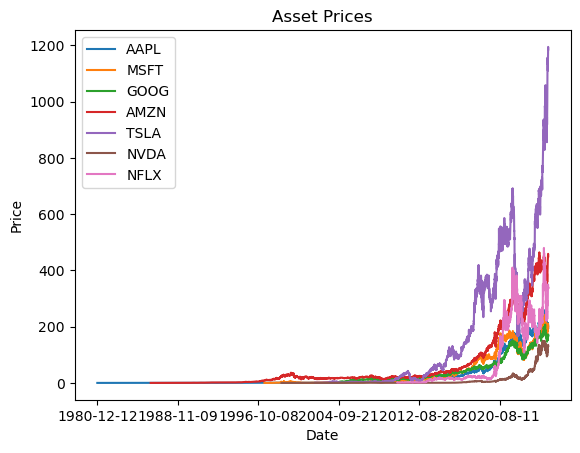

<class 'str'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [1]:
# Bring it all together for a 1.0 version. 
## 1. DATA FETCHING
# Example usage
from data_fetch import get_price
from portfolio import Portfolio
from plotter import plot_prices
import pandas as pd
import datetime

shares = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'TSLA', 'NVDA', 'NFLX']
num_shares = [1, 1, 1, 1, 1, 1, 1] # Number of shares for each asset
portfolio = Portfolio()
for i, symbol in enumerate(shares):
    portfolio.add_asset(symbol, num_shares[i])



#prices_df = get_price(shares)
#prices_df.to_csv('prices.csv', index=True)


#retrieve data from csv
prices_df = pd.read_csv('prices.csv')
prices_df

columns_to_filter = ['Price', 'Close']
for i,element in enumerate(shares[1:]):
    columns_to_filter.append('Close'+'.'+str(i+1))
    print(columns_to_filter)

#filtering the columns to get only the closing prices
prices_close_df = prices_df[columns_to_filter]

column_new = ['Date']
for i,element in enumerate(shares):
    column_new.append(element)
print(column_new)
prices_close_df.columns = column_new

#erase rows 0 and 1
prices_close_df = prices_close_df.drop([0, 1])

prices_close_df.set_index('Date', inplace=True)
print(prices_close_df)

#Changing output of dataframe to float
print(portfolio.holdings['AAPL'])
#print(prices_close_df['AAPL'])
print(prices_close_df['AAPL']['2025-05-23'])
today = datetime.date.today()
print(today not in prices_close_df['AAPL'].index)
date = datetime.datetime.strptime("2024-12-31", '%Y-%m-%d')
print("Portfolio Value:", portfolio.get_portfolio_value(prices_close_df))

value = portfolio.get_portfolio_value(prices_close_df)
value

#1. basic visualization of stock prices.
#prices_close_df
prices_close_df = prices_close_df.astype(float) #turn values to float
plot_prices(prices_close_df)

import pandas as pd
#retrieve data from csv
prices_pdates = pd.read_csv('prices.csv', parse_dates=True)
prices_pdates = prices_pdates.drop([0, 1])
prices_pdates = prices_pdates.rename(columns={'Price': 'Date'})
prices_pdates

from datetime import datetime
# prices_pdates.columns
prices_pdates_out = prices_pdates['Date']
prices_pdates_list= prices_pdates_out.tolist()
print(type(prices_pdates_list[0]))
prices_pdates_list_e1 =datetime.strptime(prices_pdates_list[0], '%Y-%m-%d') #Transform the first date to datetime object
prices_pdates_list_e1

#turn values in Date column to datetime objects (PANDAS METHOD)
prices_pdates['Date_a'] = pd.to_datetime(prices_pdates['Date'])

# Convert the 'Date' column to datetime objects (PYTHON METHOD)
prices_pdates['Date_ b'] = prices_pdates['Date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))  # Format to string

# check the type of the first element in the 'Date' columns
print(type(prices_pdates['Date_a'].to_list()[0]))  # PANDAS METHOD
print(type(prices_pdates['Date_ b'].to_list()[0]))  # PYTHON METHOD

#both work. Need to change the code to use dynamic dates. 